In [3]:
from zget_data import get_responses, get_qdetails, page_map, attention, quest_map
import pandas as pd
import json

In [4]:
password_response, time_response, survey_response = get_responses(5)

Total: 26


## Password Analysis

In [5]:
pd.DataFrame(password_response)

,password2
0,CozyBi11$
1,PRO333TECT
2,moasdjkleR-
3,visotech@2023
4,blake
5,Up9@$LZm
6,berry56
7,123456789
8,vistech2022
9,12john$ena


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.174,11.211,6.987,15.680,36.149,110.712,12.244,35.100,16.638,24.316,8.088,28.816,5.185250
1,1.664,22.872,3.551,5.522,43.416,115.263,2.750,48.463,7.047,17.072,15.119,96.297,6.317267
2,2.518,24.259,6.060,23.769,64.722,155.704,16.275,103.741,24.917,38.085,29.028,41.692,8.846167
3,1.185,6.706,2.497,4.896,30.463,44.975,3.134,30.806,6.813,9.182,12.165,42.267,3.251483
4,2.279,11.596,2.961,19.275,26.708,73.747,5.899,63.512,12.727,18.612,4.775,39.436,4.692117


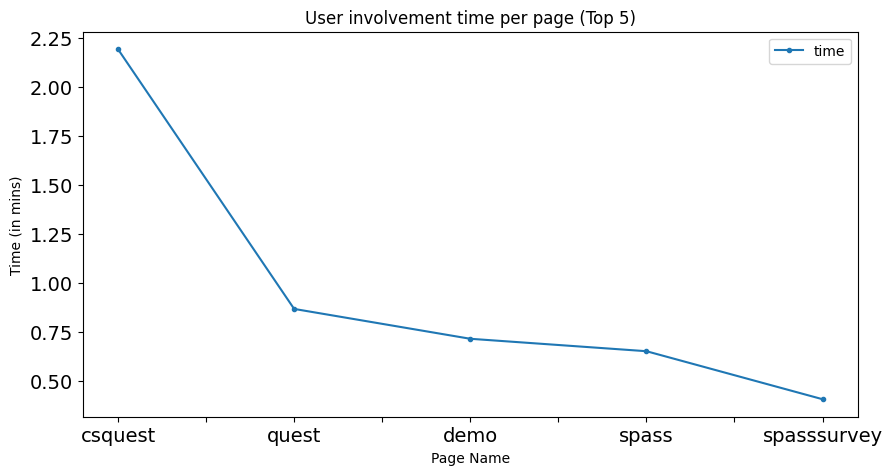

In [6]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [7]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [8]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_9654/349911366.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  quest.update(normquest)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
helpful,7.0,7.0,5.0,4.0,7.0,1.0,5.0,3.0,6.0,6.0,...,7.0,4.0,7.0,1.0,7.0,5.0,3.0,6.0,5.038462,5.000000
structured,6.0,6.0,5.0,5.0,7.0,4.0,4.0,5.0,5.0,6.0,...,7.0,6.0,5.0,7.0,6.0,5.0,4.0,5.0,5.461538,5.461538
ordered,7.0,7.0,5.0,4.0,5.0,4.0,4.0,3.0,5.0,7.0,...,7.0,6.0,6.0,4.0,7.0,4.0,3.0,5.0,5.384615,5.384615
rewarding,5.0,7.0,3.0,2.0,6.0,1.0,3.0,3.0,6.0,5.0,...,6.0,6.0,3.0,1.0,6.0,3.0,2.0,5.0,4.423077,5.000000
beneficial,6.0,6.0,5.0,2.0,5.0,1.0,2.0,4.0,7.0,7.0,...,7.0,3.0,6.0,1.0,7.0,5.0,3.0,7.0,5.000000,6.000000
well grouped,7.0,6.0,4.0,4.0,5.0,2.0,4.0,6.0,6.0,5.0,...,7.0,5.0,7.0,4.0,6.0,6.0,4.0,5.0,5.269231,5.000000
organized,7.0,7.0,5.0,5.0,5.0,4.0,5.0,4.0,6.0,7.0,...,7.0,7.0,6.0,4.0,7.0,4.0,3.0,5.0,5.461538,5.000000
appealing,5.0,6.0,3.0,6.0,5.0,1.0,6.0,4.0,6.0,7.0,...,6.0,6.0,5.0,1.0,5.0,5.0,3.0,6.0,4.884615,5.000000
understandable,7.0,6.0,7.0,6.0,5.0,4.0,5.0,5.0,6.0,7.0,...,7.0,6.0,7.0,7.0,7.0,5.0,5.0,6.0,5.961538,6.000000
clear,7.0,3.0,3.0,6.0,5.0,4.0,3.0,3.0,6.0,1.0,...,7.0,6.0,7.0,7.0,6.0,5.0,4.0,6.0,5.115385,5.115385


In [9]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')

Perspicuity: 5.5
Aesthetics: 4.653846153846154
Usefulness: 4.875
Clarity: 5.394230769230768


### CSQuest

In [10]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['8-1', '10-1']
csquestqual = csquest.loc[qualindex]
csquestqual.to_csv('qualitative/csquest_consequences.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
8-1,"[Social Media, Email, Financial Websites, Cour...","[Social Media, Email]","[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Government Websites]",[None of the above],"[Social Media, Email, E-commerce Websites]","[Email, Gaming Websites, E-commerce Websites]","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Gami...",...,"[Email, Financial Websites, E-commerce Website...","[Email, Financial Websites, E-commerce Website...","[Financial Websites, Gaming Websites, E-commer...","[Social Media, Email]","[Social Media, Email, Financial Websites, Gami...",[None of the above],"[Email, Financial Websites, Gaming Websites, E...",[Financial Websites],"[Financial Websites, E-commerce Websites]","[Email, Financial Websites, E-commerce Website..."
10-1,The possibility of it showing a threat by only...,THE LAST PART IS REALLT MOTIVATES TO MAKE A ST...,"The fear of my personal information (phone, lo...",email and social media,the hacker being able to steal it so eaisly,Literally nothing. It looks like it was create...,online account,"use a mix number,character,name ,symbol",email and social media,Yes the strong password was not being hacked e...,...,The result seems like the best motivator for m...,None specifically.,The area that shows the hacker gaining access ...,Second part,The first slide just sets the scene. It's the...,None. fyi - One of my skills and experiences ...,My credit card info being hacked,i would most strong password to make with my b...,"When I see ""Credit Card Info"" as one of the pi...",The hacker's screen saying attack successful a...


In [11]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_9654/3295141098.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  csquestquant.update(normquest)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
portrayal of hacker stimulates,5.0,6.0,5.0,5.0,7.0,1.0,5.0,6.0,5.0,6.0,...,6.0,6.0,6.0,1.0,5.0,5.0,3.0,6.0,5.153846,5.153846
portrayal of victim encourages,5.0,4.0,5.0,5.0,5.0,1.0,5.0,5.0,4.0,6.0,...,6.0,5.0,6.0,1.0,7.0,5.0,3.0,6.0,4.923077,5.000000
Makes me worried,6.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,5.0,7.0,...,4.0,6.0,3.0,1.0,7.0,5.0,2.0,1.0,4.230769,4.230769
Encourages me to create a strong password,6.0,7.0,5.0,6.0,7.0,1.0,5.0,5.0,4.0,4.0,...,6.0,5.0,6.0,1.0,6.0,4.0,5.0,1.0,5.038462,5.000000
Makes me feel emotionally connected to the presented scenario,3.0,5.0,2.0,6.0,5.0,1.0,6.0,3.0,4.0,6.0,...,4.0,6.0,7.0,1.0,2.0,5.0,2.0,2.0,4.346154,5.000000
Makes me feel personally connected to the presented scenario,2.0,6.0,2.0,5.0,5.0,1.0,4.0,6.0,5.0,5.0,...,4.0,6.0,5.0,1.0,5.0,6.0,3.0,1.0,4.307692,5.000000
easy to follow,7.0,5.0,3.0,5.0,6.0,4.0,5.0,4.0,5.0,6.0,...,7.0,3.0,7.0,7.0,7.0,5.0,5.0,1.0,5.346154,5.000000
Informative,6.0,6.0,5.0,5.0,6.0,1.0,5.0,5.0,6.0,7.0,...,7.0,6.0,7.0,1.0,6.0,4.0,2.0,3.0,5.038462,5.038462
To the Point,7.0,5.0,5.0,7.0,5.0,1.0,5.0,5.0,6.0,7.0,...,7.0,6.0,7.0,5.0,7.0,5.0,4.0,2.0,5.269231,5.000000
Easy to understand,7.0,6.0,5.0,6.0,7.0,4.0,4.0,3.0,5.0,5.0,...,7.0,3.0,7.0,7.0,7.0,5.0,5.0,2.0,5.538462,6.000000


### First Password Survey

In [12]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
"I do not change my passwords, unless I have to.",7,4,3,3,5,1,4,6,5,6,...,3,5,4,6,6,6,5,5,4.730769,5.0
I use different passwords for different online accounts that I have.,1,6,7,3,6,7,3,7,3,5,...,7,6,5,7,7,3,7,6,5.192308,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",3,5,7,4,6,7,4,6,3,6,...,6,3,3,7,7,5,6,6,5.000000,5.0
I do not include special characters in my password if it’s not required.,5,1,1,2,3,1,4,5,3,6,...,1,3,1,1,1,3,1,1,2.615385,2.0


### Second Password Survey

In [13]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
strength of password,6,6,4,4,2,6,7,6,6,7,...,6,7,6,7,7,6,6,6,5.615385,6.0
motivated after going through design,6,7,4,5,6,1,5,5,5,7,...,6,5,6,4,7,5,6,7,5.500000,6.0
Hard to remember,2,6,5,6,3,3,5,7,6,7,...,6,6,5,1,7,5,4,7,4.538462,5.0
Can be easily guessed by a hacker,3,1,3,5,7,2,4,4,5,1,...,1,6,3,4,1,2,2,1,3.153846,3.0
Can be easily guessed by my close friends or family members,1,1,1,5,5,1,4,5,4,1,...,1,4,1,1,1,3,1,1,2.500000,2.0
Stronger than the passwords I usually use,6,6,1,6,3,1,5,4,5,7,...,5,4,3,1,3,6,3,5,4.500000,5.0


### Demographics

In [14]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience
0,Man,18-24 years old,[White],Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Unemployed,No experience,No experience
1,Woman,30-34 years old,[White],Four-year College Degree,Other areas of Engineering,Non-profit organization,Pursuing or completed a degree,Formal training
2,Man,35-39 years old,[White],Graduate degree (MS/Doctorate),"Journalism, Media and Communication",Educational institution,Hold or held a work position,Hold or held a work position
3,Woman,35-39 years old,[White],Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Formal training,Pursuing or completed a degree
4,Man,40-44 years old,[Asian],High School Graduate,sales,Business or industry,Self-taught,No experience
5,Man,35-39 years old,[mixed],Four-year College Degree,Business,Business or industry,Self-taught,Self-taught
6,Woman,30-34 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Non-profit organization,Formal training,Formal training
7,Woman,40-44 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Formal training
8,Woman,35-39 years old,[White],Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Formal training
9,Woman,25-29 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Formal training


In [15]:
demo['What is your gender?'].value_counts()

KeyError: 'What is your gender?'